In [ ]:
#Ramyata Upmaka
#Looked at which parts of the plane are struck by birds, how is this different for injuries and fatalites

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import requests


In [4]:
database="Resources/Cleaned_data.csv"
df=pd.read_csv(database, low_memory=False)
df.columns


Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [11]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
4,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0


In [22]:
#Find the damage to strike ratio for each plane part when there is a bird strike (spanning 15 years)

parts_list = list()
strike_list = list()
damage_list = list()

#Get index of first airplane part
start = df.columns.get_loc('Radome Strike')
end = df.columns.get_loc('Lights Damage')

while start < end:
    
    if start == df.columns.get_loc('Engine Ingested'):
        start +=1
        continue
        
    part_name = df.columns[start][:-7]
    parts_list.append(part_name)
    
    strike = df[df.columns[start]].sum()
    damage = df[df.columns[start+1]].sum()
    
    strike_list.append(strike)
    damage_list.append(damage)
    
    start +=2
    

parts_df = pd.DataFrame({"Airplane Part": parts_list,
                       "Sum of Strikes":strike_list,
                       "Sum of Damages":damage_list}, index=parts_list)

parts_df

,Airplane Part,Sum of Strikes,Sum of Damages
Radome,Radome,18730,1587
Windshield,Windshield,24123,1025
Nose,Nose,21238,1118
Engine1,Engine1,9618,2479
Engine2,Engine2,7832,2006
Engine3,Engine3,553,168
Engine4,Engine4,334,74
Propeller,Propeller,3382,514
Wing or Rotor,Wing or Rotor,20589,4100
Fuselage,Fuselage,17821,796


It is interesting that for several plane parts, the sum of damages is greater than sum of strikes, meaning that a strike to a part can inflict damage on other parts. So it is not a one-to-one relationship between strikes and damages to a certain airplane part.

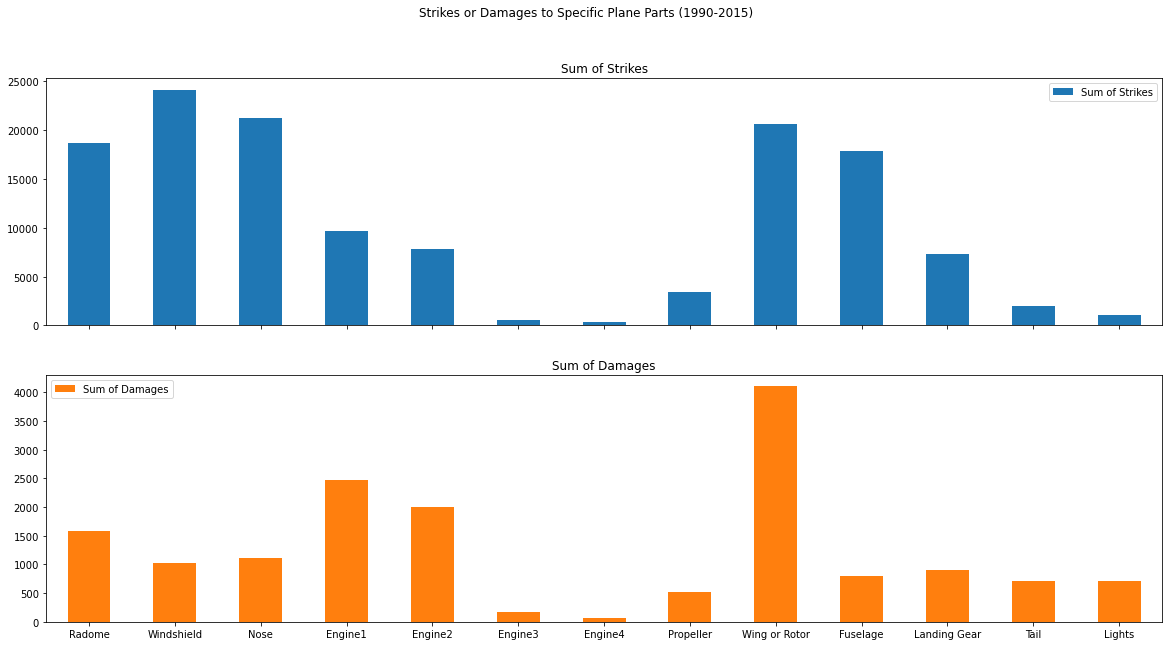

In [47]:
# Plot the Strikes and Damages per Plane Part
axes = parts_df.plot.bar(title='Strikes or Damages to Specific Plane Parts (1990-2015)', rot=0, figsize =(20,10), subplots=True)
axes[1].legend(loc=2)
plt.savefig("Output_data/PlaneParts.png")

Now generate the same plots for the subset where there were injuries

In [50]:
df_injuries = df.loc[(df['Injuries'] != 0)]

#Find the damage to strike ratio for each plane part when there is a bird strike injury

parts_list = list()
strike_list = list()
damage_list = list()

#Get index of first airplane part
start = df_injuries.columns.get_loc('Radome Strike')
end = df_injuries.columns.get_loc('Lights Damage')

while start < end:
    
    if start == df_injuries.columns.get_loc('Engine Ingested'):
        start +=1
        continue
        
    part_name = df_injuries.columns[start][:-7]
    parts_list.append(part_name)
    
    strike = df_injuries[df_injuries.columns[start]].sum()
    damage = df_injuries[df_injuries.columns[start+1]].sum()
    
    strike_list.append(strike)
    damage_list.append(damage)
    
    start +=2
    

injury_parts_df = pd.DataFrame({"Airplane Part": parts_list,
                       "Sum of Strikes":strike_list,
                       "Sum of Damages":damage_list}, index=parts_list)

injury_parts_df

,Airplane Part,Sum of Strikes,Sum of Damages
Radome,Radome,5,7
Windshield,Windshield,178,185
Nose,Nose,20,33
Engine1,Engine1,22,29
Engine2,Engine2,8,8
Engine3,Engine3,0,1
Engine4,Engine4,0,1
Propeller,Propeller,24,27
Wing or Rotor,Wing or Rotor,31,50
Fuselage,Fuselage,22,43


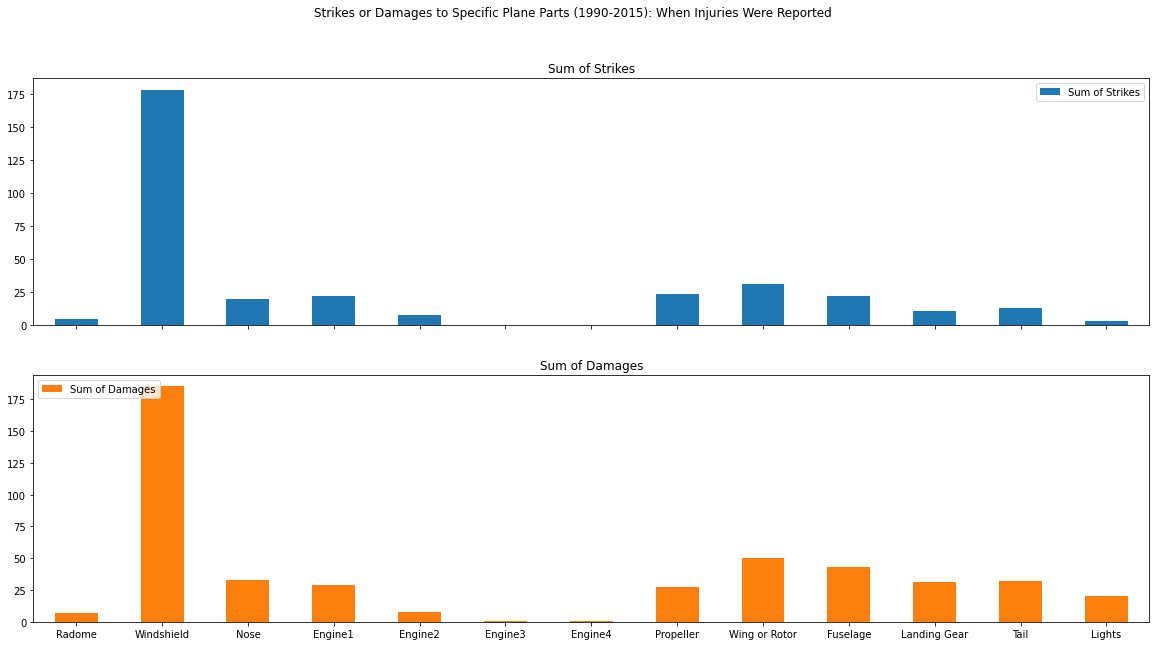

In [51]:
# Plot the Strikes and Damages per Plane Part for Injuries
axes = injury_parts_df.plot.bar(title='Strikes or Damages to Specific Plane Parts (1990-2015): When Injuries Were Reported', rot=0, figsize =(20,10), subplots=True)
axes[1].legend(loc=2)
plt.savefig("Output_data/PlanePartsInjuries.png")

Now generate the same plots for the subset where there were fatalities

In [54]:
df_fatalities = df.loc[(df['Fatalities'] != 0)]
#Find damages and strikes for each plane part when there is a bird strike fatality

parts_list = list()
strike_list = list()
damage_list = list()

#Get index of first airplane part
start = df_fatalities.columns.get_loc('Radome Strike')
end = df_fatalities.columns.get_loc('Lights Damage')

while start < end:
    
    if start == df_fatalities.columns.get_loc('Engine Ingested'):
        start +=1
        continue
        
    part_name = df_fatalities.columns[start][:-7]
    parts_list.append(part_name)
    
    strike = df_fatalities[df_fatalities.columns[start]].sum()
    damage = df_fatalities[df_fatalities.columns[start+1]].sum()
    
    strike_list.append(strike)
    damage_list.append(damage)
    
    start +=2
    

fatality_parts_df = pd.DataFrame({"Airplane Part": parts_list,
                       "Sum of Strikes":strike_list,
                       "Sum of Damages":damage_list}, index=parts_list)

fatality_parts_df

,Airplane Part,Sum of Strikes,Sum of Damages
Radome,Radome,0,3
Windshield,Windshield,2,6
Nose,Nose,0,5
Engine1,Engine1,2,7
Engine2,Engine2,0,1
Engine3,Engine3,0,0
Engine4,Engine4,0,0
Propeller,Propeller,1,6
Wing or Rotor,Wing or Rotor,3,8
Fuselage,Fuselage,0,8


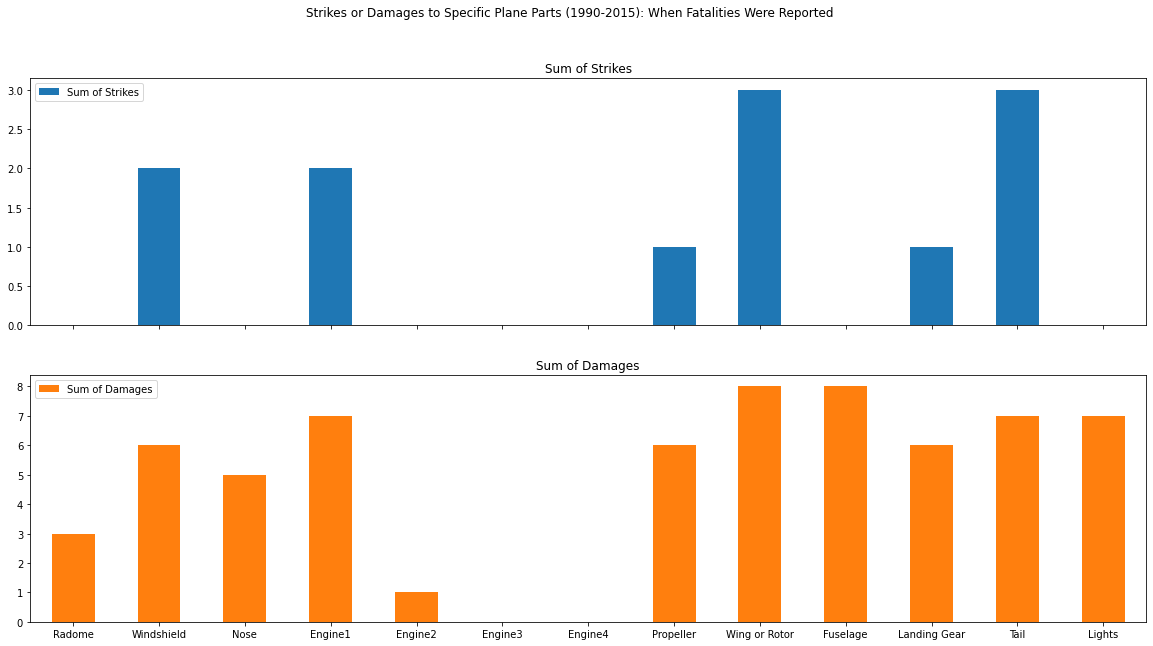

In [55]:
# Plot the Strikes and Damages per Plane Part for fatalities
axes = fatality_parts_df.plot.bar(title='Strikes or Damages to Specific Plane Parts (1990-2015): When Fatalities Were Reported', rot=0, figsize =(20,10), subplots=True)
axes[1].legend(loc=2)
plt.savefig("Output_data/PlanePartsFatalities.png")